# Funciones de distribución de probabilidades

## Distribución uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
a=1
b=100
n=2000000
data = np.random.uniform(a,b,n)

(array([199927., 200338., 200512., 199549., 199892., 200173., 200076.,
        199933., 200106., 199494.]),
 array([ 1.00001088, 10.90000393, 20.79999699, 30.69999004, 40.5999831 ,
        50.49997615, 60.39996921, 70.29996226, 80.19995532, 90.09994837,
        99.99994142]),
 <a list of 10 Patch objects>)

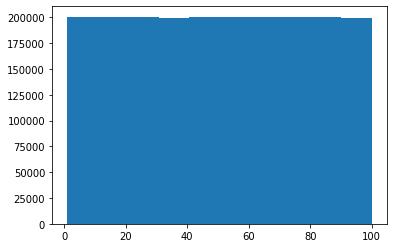

In [12]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [20]:
data = np.random.randn(1000000)

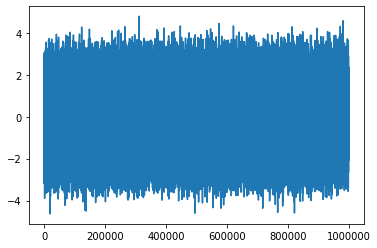

In [21]:
x = range(1,1000001)
plt.plot(x, data)

(array([1.12000e+02, 2.86800e+03, 3.26410e+04, 1.58188e+05, 3.36818e+05,
        3.15271e+05, 1.29256e+05, 2.30250e+04, 1.75800e+03, 6.30000e+01]),
 array([-4.63300867, -3.69115674, -2.74930482, -1.80745289, -0.86560097,
         0.07625096,  1.01810288,  1.95995481,  2.90180673,  3.84365866,
         4.78551058]),
 <a list of 10 Patch objects>)

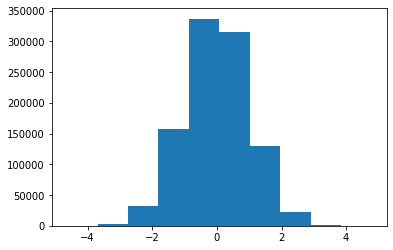

In [22]:
plt.hist(data)

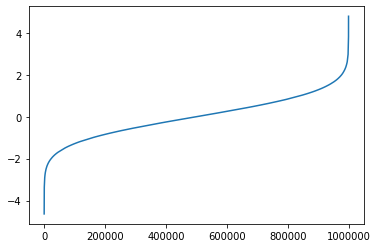

In [23]:
plt.plot(x,sorted(data))

(array([   8.,   63.,  380., 1359., 2580., 2830., 1839.,  741.,  172.,
          28.]),
 array([-4.3248936 , -2.44427278, -0.56365196,  1.31696886,  3.19758967,
         5.07821049,  6.95883131,  8.83945213, 10.72007295, 12.60069376,
        14.48131458]),
 <a list of 10 Patch objects>)

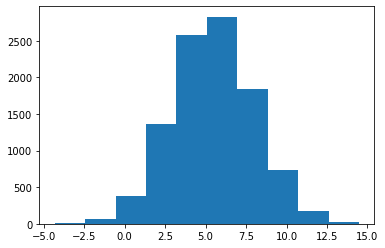

In [29]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu+sd*Z_10000 # Z = (X - mu) / sd
plt.hist(data)

In [30]:
data = np.random.randn(2,4)
data

array([[-0.996748  ,  0.73700374,  0.43763262, -0.29202639],
       [ 0.94278181,  0.50318017,  1.36857142, -0.55041243]])

## La simulación de Monte Carlo

* Generamos 2 números aleatorios uniformes x e y entre 0 y 1, en total 1000 veces
* Calculamos x^2 + y^2
    * Si el valor es inferior a 1 -> estamos dentro del círculo
    * Si el valor es superior a 1 -> estamos fuera del círculo
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de pi.
* Repetimos el experimento un número de suficiente de veces (por ejemplo 1000), para obtener diferentes aproximaciones de π.
* Calculamos el promedio de los 1000 experimentos anteriores, para dar un valor final aproximado de π.

In [48]:
def pi_montecarlo(n, n_exp):

    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j]**2+y[j]**2)
            if z<=1:
                value+=1
        float_value = float(value)
        pi_value = float_value* 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    fig = plt.plot(pi_value_list)
    return (pi, fig)

(3.1415179999999996, [<matplotlib.lines.Line2D at 0x7f8a4b17afd0>])

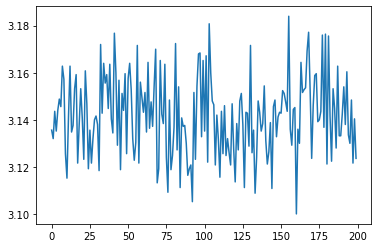

In [49]:
pi_montecarlo(10000,2000)

### Dummy Data Sets

In [11]:
n=1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5*np.random.randn(n),
        'C' : np.random.uniform(5,32, n)
    }
)

In [12]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000032,1.498745,18.499625
std,0.999828,2.499827,7.796824
min,-4.610628,-10.106458,5.000001
25%,-0.673564,-0.189504,11.753499
50%,0.000515,1.495123,18.497213
75%,0.674104,3.185014,25.251077
max,4.734320,13.170988,31.999961


(array([1.18000e+02, 2.94000e+03, 3.21990e+04, 1.55943e+05, 3.33163e+05,
        3.16091e+05, 1.32763e+05, 2.47290e+04, 1.99400e+03, 6.00000e+01]),
 array([-4.61062797, -3.67613319, -2.74163842, -1.80714364, -0.87264887,
         0.06184591,  0.99634069,  1.93083546,  2.86533024,  3.79982501,
         4.73431979]),
 <a list of 10 Patch objects>)

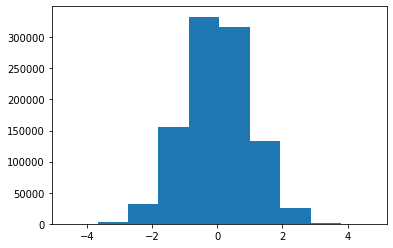

In [13]:
plt.hist(data["A"])

(array([1.08000e+02, 2.62300e+03, 2.92510e+04, 1.47427e+05, 3.26482e+05,
        3.21371e+05, 1.42417e+05, 2.77900e+04, 2.44300e+03, 8.80000e+01]),
 array([-10.10645777,  -7.77871316,  -5.45096856,  -3.12322395,
         -0.79547934,   1.53226526,   3.86000987,   6.18775448,
          8.51549908,  10.84324369,  13.1709883 ]),
 <a list of 10 Patch objects>)

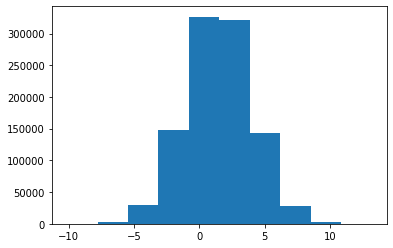

In [14]:
plt.hist(data["B"])

(array([100214.,  99732., 100053., 100125.,  99974., 100004.,  99927.,
         99788.,  99890., 100293.]),
 array([ 5.00000132,  7.69999724, 10.39999316, 13.09998908, 15.799985  ,
        18.49998092, 21.19997685, 23.89997277, 26.59996869, 29.29996461,
        31.99996053]),
 <a list of 10 Patch objects>)

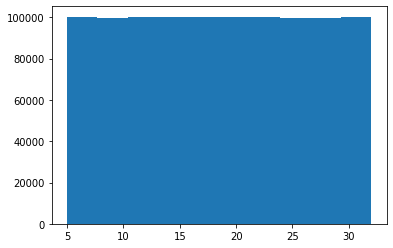

In [15]:
plt.hist(data["C"])

In [16]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [17]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [18]:
column_names = data.columns.values.tolist()

In [19]:
a = len(column_names)
a

21

In [24]:
new_data = pd.DataFrame(
    {
        'Column Name': column_names,
        'A': np.random.randn(a),
        'B': np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [25]:
new_data

,Column Name,A,B
42,State,-1.913575,0.820179
43,Account Length,-0.488940,0.559409
44,Area Code,-0.122554,0.466038
45,Phone,-1.773874,0.740293
46,Int'l Plan,0.171151,0.950804
47,VMail Plan,-0.098998,0.520079
48,VMail Message,-0.611696,0.497191
49,Day Mins,0.082200,0.218726
50,Day Calls,0.141863,0.974629
51,Day Charge,-0.093453,0.586704
